In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from cycler import cycler
from datetime import date

%matplotlib inline
%config InlineBackend.figure_format='retina'

plt.style.use('/home/hosilva/tools/mplstyle/timesnromanstyle.mplstyle')

from __future__ import unicode_literals

In [2]:
import lal, lalsimulation

In [3]:
from tools import find_kde
from tools import combined_posterior

In [4]:
from scipy.interpolate import InterpolatedUnivariateSpline as ius
from scipy.optimize import brentq

In [5]:
def find_threshold(mass, thr_coef=1/2.):
    m_in_km = np.median(mass) * Msun_to_km
    return thr_coef * m_in_km

def find_cdf_at_threshold(m, l, lmax=68):
    # Take the posterior distribution and from seaborn's KDE extract
    # the points from the curve.
    l_tmp, pdf_tmp = find_kde(l)
    
    # Create an interpolating function for the posterior
    pdf_l_tmp = ius(l_tmp, pdf_tmp)
    
    # Calculate CDF at sample values of l by integrating the posterior
    l_vals = np.arange(0, lmax + 1, 1)
    cdf_tmp = [pdf_l_tmp.integral(0, lmax) for lmax in l_vals]
    cdf_l_tmp = ius(l_vals, cdf_tmp)
    
    # Find where it is 90%
    def find_x90(x): return cdf_l_tmp(x) - 0.90
    def find_x68(x): return cdf_l_tmp(x) - 0.68
    x90 = brentq(find_x90, 0, max(l_vals))
    x68 = brentq(find_x68, 0, max(l_vals))
    print(x68, x90, find_threshold(m, 1/2.))
    
    # Set a number of epsilon and calculate the thresholds values
    epsilon_vals  = np.arange(0, 1.0 + 0.01, 0.01)
    m_thresholds  = np.array([find_threshold(m, eps) for eps in epsilon_vals]) # in km

    # Finally, calculate the cdf at the threshold values
    cdf_at_m_thresholds = np.array([cdf_l_tmp(m) for m in m_thresholds])
    
    return epsilon_vals, cdf_at_m_thresholds

In [6]:
Msun_to_km = 1.476

In [7]:
# Load data

data_GW150914_eft = np.genfromtxt("/home/abhirup.ghosh/Documents/Work/spinqnm/runs/parspec/GW150914/p4_l_df0_dtau0_EFT/cbcBayes/posterior_samples.dat", names=True, dtype=None)
data_GW200129_eft = np.genfromtxt("/home/abhirup.ghosh/Documents/Work/spinqnm/runs/parspec/GW200129/p4_l_df0_dtau0_EFT/cbcBayes/posterior_samples.dat", names=True, dtype=None)

OSError: /home/abhirup.ghosh/Documents/Work/spinqnm/runs/parspec/GW150914/p4_l_df0_dtau0_EFT/cbcBayes/posterior_samples.dat not found.

In [ ]:
GW150914_eft_leven  = data_GW150914_eft['domega220']
GW150914_eft_lodd   = data_GW150914_eft['dtau220']
GW150914_eft_m2     = data_GW150914_eft['m2_source']
GW150914_eft_mf     = data_GW150914_eft['mf_source_evol']

GW200129_eft_leven  = data_GW200129_eft['domega220']
GW200129_eft_lodd   = data_GW200129_eft['dtau220']
GW200129_eft_m2     = data_GW200129_eft['m2_source']
GW200129_eft_mf     = data_GW200129_eft['mf_source_evol']

print(len(GW150914_eft_leven), len(GW200129_eft_leven))

(0.0, 0.02)

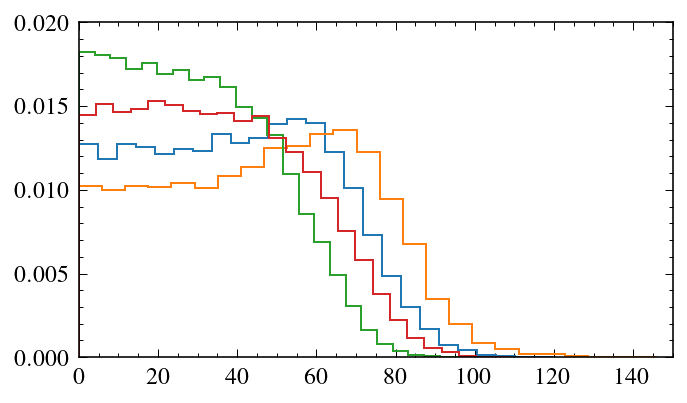

In [14]:
plt.hist(GW150914_eft_leven, density=True, histtype='step', bins=25, ls='-',  label=r"$j=0$");
plt.hist(GW150914_eft_lodd,  density=True, histtype='step', bins=25, ls='-',  label=r"$j=0$");
plt.hist(GW200129_eft_leven, density=True, histtype='step', bins=25, ls='-',  label=r"$j=0$");
plt.hist(GW200129_eft_lodd,  density=True, histtype='step', bins=25, ls='-',  label=r"$j=0$");
plt.xlim(0, 150)
plt.ylim(0, 0.02)

/local/tmp/hosilva/ipykernel_2293601/3125577226.py:6: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


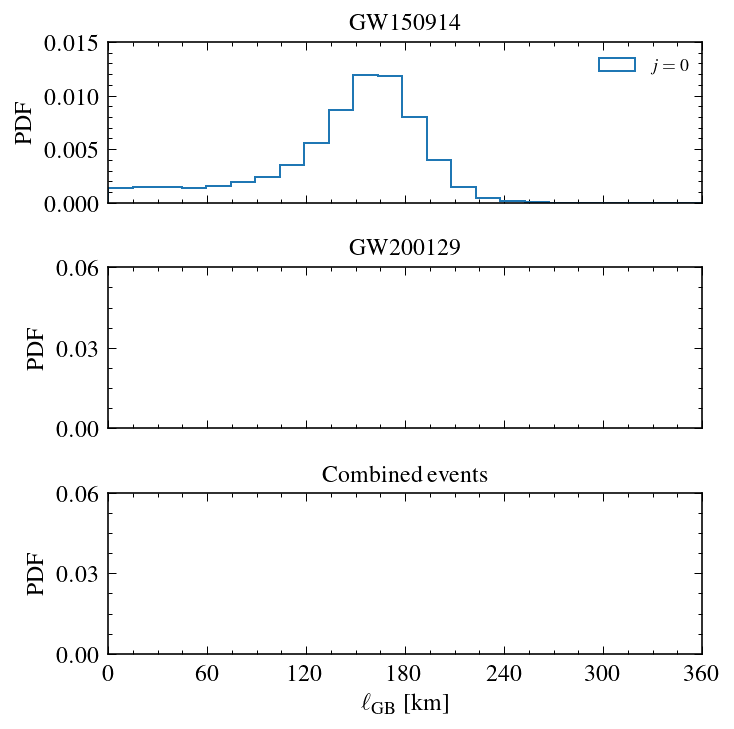

In [33]:
x = [['A', 'A', 'A'],
     ['B', 'B', 'B'],
     ['C', 'C', 'C']]

f, axes = plt.subplot_mosaic(mosaic=x, figsize=(5, 5), gridspec_kw={'hspace': 0.4, 'wspace': 0.6, 'bottom':0.1})
plt.tight_layout()

for k in ('A', 'B', 'C'):
    axes[k].set_xlim(0, 360)
    axes[k].xaxis.set_ticks(np.arange(0, 360+60, 60))
    
for k in ('A', 'B'):
    axes[k].set_xticklabels([]);
    
axes['C'].set_xlabel(r'$\lambda_{\rm e} \ell$ [km]');

# axes['A'].hist(GW150914_edgb_l, density=True, histtype='step', bins=25, ls='-',  label=r"$j=0$");
# axes['A'].hist(GW150914_spin_edgb_l, density=True, histtype='step', bins=25, ls='--', label=r"$j=0,1$");
axes['A'].set_ylim(0, 0.015);
# axes['A'].yaxis.set_ticks([0, 0.05, 0.10]);
axes['A'].set_title("GW150914");
axes['A'].legend(loc='upper right', fontsize=9);
axes['A'].set_ylabel("PDF");

# axes['B'].hist(GW200129_edgb_l,      density=True, histtype='step', bins=25, ls='-',  label=r"$j=0$");
# axes['B'].hist(GW200129_spin_edgb_l, density=True, histtype='step', bins=25, ls='--', label=r"$j=0,1$");
axes['B'].set_ylim(0, 0.06);
axes['B'].yaxis.set_ticks([0, 0.03, 0.06]);
axes['B'].set_title("GW200129");
axes['B'].legend(loc='upper right', fontsize=9);
axes['B'].set_ylabel("PDF");

axes['C'].set_title("Combined events");
# axes['C'].xaxis.set_ticks(np.arange(0, 60+10, 10))
axes['C'].set_ylabel("PDF");
# axes['C'].plot(dcs_l_combined, y_dcs_l_combined, '-',  label=r"$j=0$")
# axes['C'].plot(dcs_l_spin_combined, y_dcs_l_spin_combined, '--', label=r"$j=0,1$")
axes['C'].legend(loc='upper right', fontsize=9);
axes['C'].set_ylim(0, 0.06)
axes['C'].yaxis.set_ticks([0, 0.03, 0.06]);

plt.savefig('fig_output/eft_even_posteriors_combined.pdf')

/.auto/home/hosilva/python38_venv/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


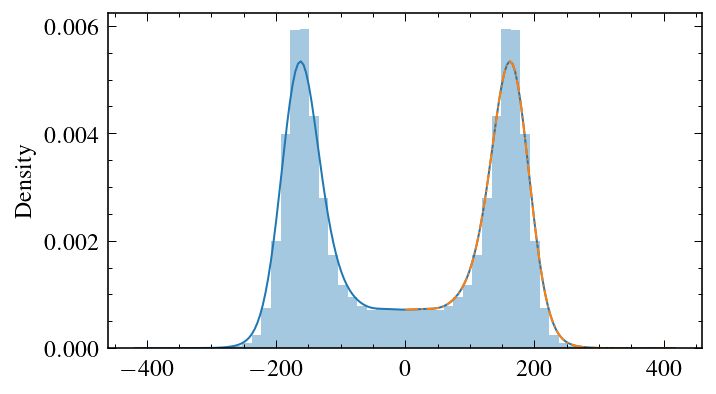

In [34]:
GW150914_edgb_pdf_x, GW150914_edgb_pdf_y = find_kde(GW150914_edgb_l)

In [45]:
print(max(GW150914_edgb_pdf_x))
# print(np.arange(0, 418 + 1, 1))

418.00432261130646


197.15998001855883 197.15998001855883 22.081519018252397 45.84189029871594


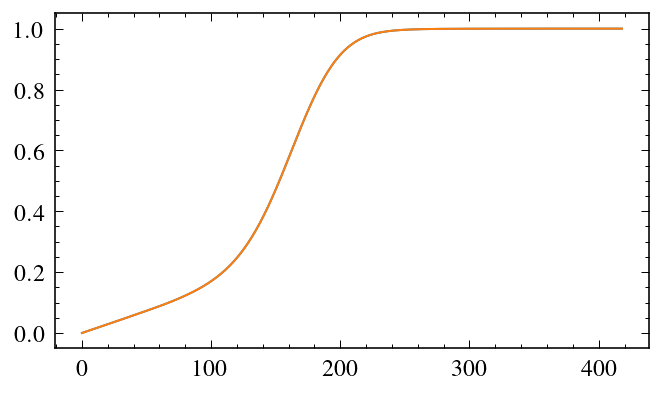

In [49]:
GW150914_edgb_pdf_interp = ius(GW150914_edgb_pdf_x, GW150914_edgb_pdf_y)

l_tmp = np.arange(0, 418 + 1, 1)

GW150914_edgb_cdf_y = [GW150914_edgb_pdf_interp.integral(0, lnow) for lnow in l_tmp]

GW150914_edgb_cdf_interp = ius(l_tmp, GW150914_edgb_cdf_y)

plt.plot(l_tmp, GW150914_edgb_cdf_y)
plt.plot(l_tmp, GW150914_edgb_cdf_interp(l_tmp))

def find_x90(x): return GW150914_edgb_cdf_interp(x) - 0.90
def find_x68(x): return GW150914_edgb_cdf_interp(x) - 0.68

GW150914_edgb_x90 = brentq(find_x90, 0, max(l_tmp))
GW150914_edgb_x68 = brentq(find_x90, 0, max(l_tmp))
print(GW150914_edgb_x68, GW150914_edgb_x90, find_threshold(GW150914_edgb_m2, 1/2.), find_threshold(GW150914_edgb_mf, 1/2.))
    
# plt.plot(l_tmp, GW150914_edgb_pdf_interp(l_tmp))
# plt.hist(GW150914_edgb_l, density=True)

/.auto/home/hosilva/python38_venv/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


169.9293117646652 197.15998001855883 45.84189029871594


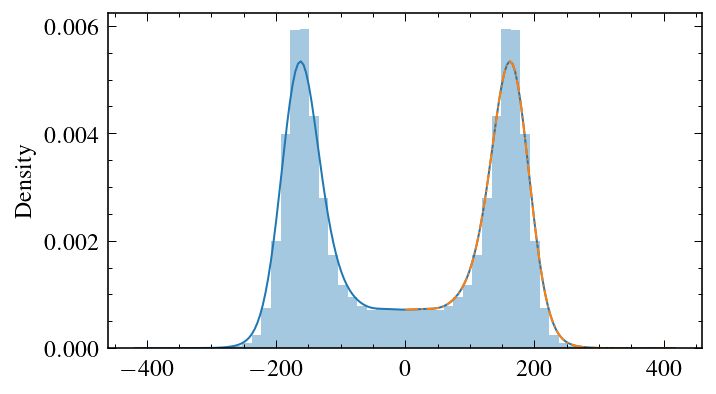

In [55]:
eps_val, GW150914_mf = find_cdf_at_threshold(GW150914_edgb_mf, GW150914_edgb_l, 418);

/.auto/home/hosilva/python38_venv/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


169.9293117646652 197.15998001855883 22.081519018252397


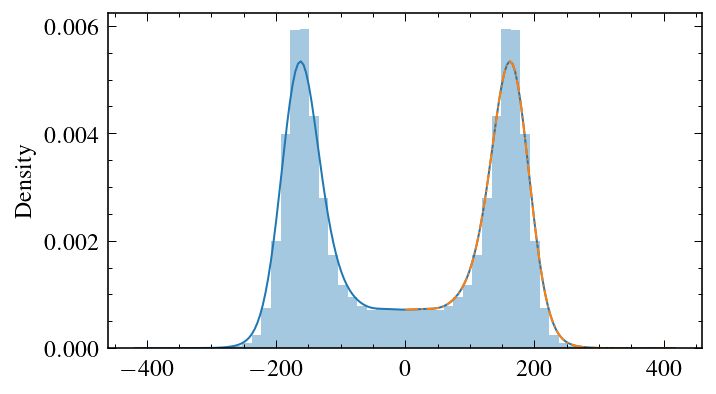

In [56]:
_, GW150914_m2 = find_cdf_at_threshold(GW150914_edgb_m2, GW150914_edgb_l, 418)

/local/tmp/hosilva/ipykernel_2293601/2444972718.py:5: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


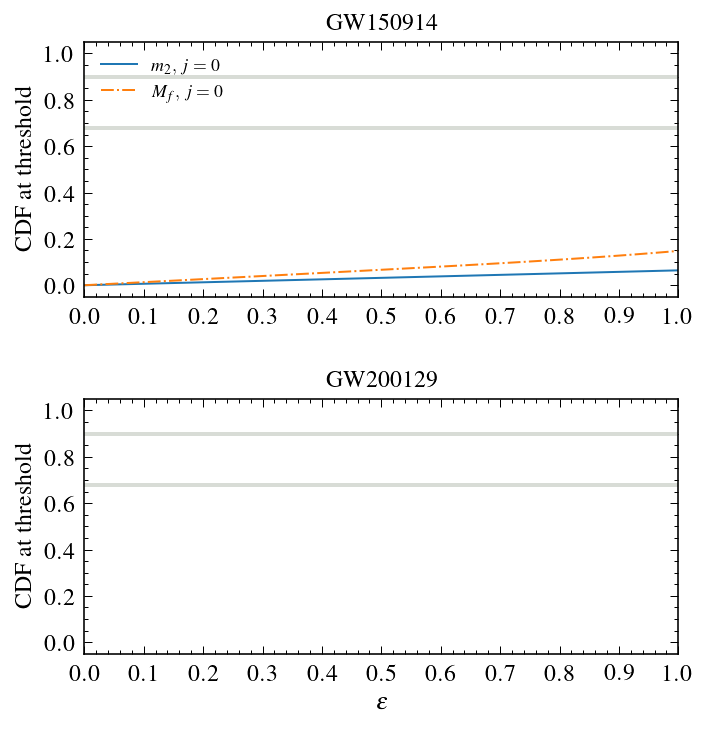

In [57]:
x = [['A', 'A', 'A'],
     ['B', 'B', 'B']]

f, axes = plt.subplot_mosaic(mosaic=x, figsize=(5, 5), gridspec_kw={'hspace': 0.4, 'wspace': 0.5, 'bottom': 0.1})
plt.tight_layout()

for k in ('A', 'B'):
    axes[k].set_xlim(0, 1)
    axes[k].set_ylim(-0.05, 1.05)
    axes[k].xaxis.set_ticks(np.arange(0, 1 + 0.1, 0.1))
    axes[k].axhline(0.90, color='xkcd:light gray', lw=2)
    axes[k].axhline(0.68, color='xkcd:light gray', lw=2)

# -------
# Panel A
# -------
axes['A'].plot(eps_val, GW150914_m2,      'C0-',  label=r"$m_{2}, \, j=0$")
# axes['A'].plot(eps_val, GW150914_m2_spin, 'C0--', label=r"$m_{2}, \, j=0,1$")
axes['A'].plot(eps_val, GW150914_mf,      'C1-.', label=r"$M_{f}, \, j=0$")
# axes['A'].plot(eps_val, GW150914_mf_spin, 'C1:',  label=r"$M_{f}, \, j=0,1$")
axes['A'].set_ylabel('CDF at threshold')
axes['A'].set_title("GW150914");
axes['A'].legend(loc='upper left', fontsize=9, facecolor='white');
axes['A'].yaxis.set_ticks([0, 0.2, 0.4, 0.6, 0.8, 1.0]);

# -------
# Panel B
# -------
# axes['B'].plot(eps_val, GW200129_m2,      'C0-',  label=r"$m_{2}, \, j=0$")
# axes['B'].plot(eps_val, GW200129_m2_spin, 'C0--', label=r"$m_{2}, \, j=0,1$")
# axes['B'].plot(eps_val, GW200129_mf,      'C1-.', label=r"$M_{f}, \, j=0$")
# axes['B'].plot(eps_val, GW200129_mf_spin, 'C1:',  label=r"$M_{f}, \, j=0,1$")
axes['B'].set_ylabel('CDF at threshold')
axes['B'].set_xlabel(r'$\varepsilon$')
axes['B'].set_title("GW200129");
axes['B'].legend(loc='lower right', fontsize=9);
axes['B'].yaxis.set_ticks([0, 0.2, 0.4, 0.6, 0.8, 1.0]);

plt.savefig('fig_output/edgb_cdf_varying_threshold.pdf')